In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Imputer 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import time
import random
from sklearn.model_selection import KFold
%matplotlib inline


In [2]:
dataset = pd.read_csv("/Users/karansingh/Documents/CS505 Random Forests/indian_liver_patient.csv")

In [3]:
mod_dataset = dataset

mod_dataset['Gender'] = mod_dataset['Gender'].map({"Male": int(1), "Female" : int(0)})

mod_dataset['Dataset'] = mod_dataset['Dataset'].map({int(1): int(1), int(2): int(0)})

mod_dataset.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [4]:
mod_dataset.head()

mod_dataset.replace(r'\s+', np.nan, regex=True)
#mod_dataset = mod_dataset.dropna()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [5]:
# Prepare Data For Training
X = mod_dataset.iloc[:, 0:10].values

imp = Imputer(missing_values=np.nan, strategy='mean')

imp.fit(X)

X = imp.transform(X)

In [6]:
print(X[209,:])
X

[ 45.          0.          0.9         0.3       189.         23.
  33.          6.6         3.9         0.9470639]


array([[65.  ,  0.  ,  0.7 , ...,  6.8 ,  3.3 ,  0.9 ],
       [62.  ,  1.  , 10.9 , ...,  7.5 ,  3.2 ,  0.74],
       [62.  ,  1.  ,  7.3 , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [52.  ,  1.  ,  0.8 , ...,  6.4 ,  3.2 ,  1.  ],
       [31.  ,  1.  ,  1.3 , ...,  6.8 ,  3.4 ,  1.  ],
       [38.  ,  1.  ,  1.  , ...,  7.3 ,  4.4 ,  1.5 ]])

In [7]:
Y = mod_dataset.iloc[:,10].values

In [8]:
# The following code divides data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state =42)


In [10]:
# Set the random state for reproducbility
fit_rf = RandomForestClassifier(random_state = 42)

# Hyperparameters Optimization

np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)

print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)

end = time.time()

print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}
Time taken in grid search:  4.65


In [11]:
#Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Text(0.5,1,'OOB Error Rate Across various Forest sizes \n(From 700 to 1000 trees)')

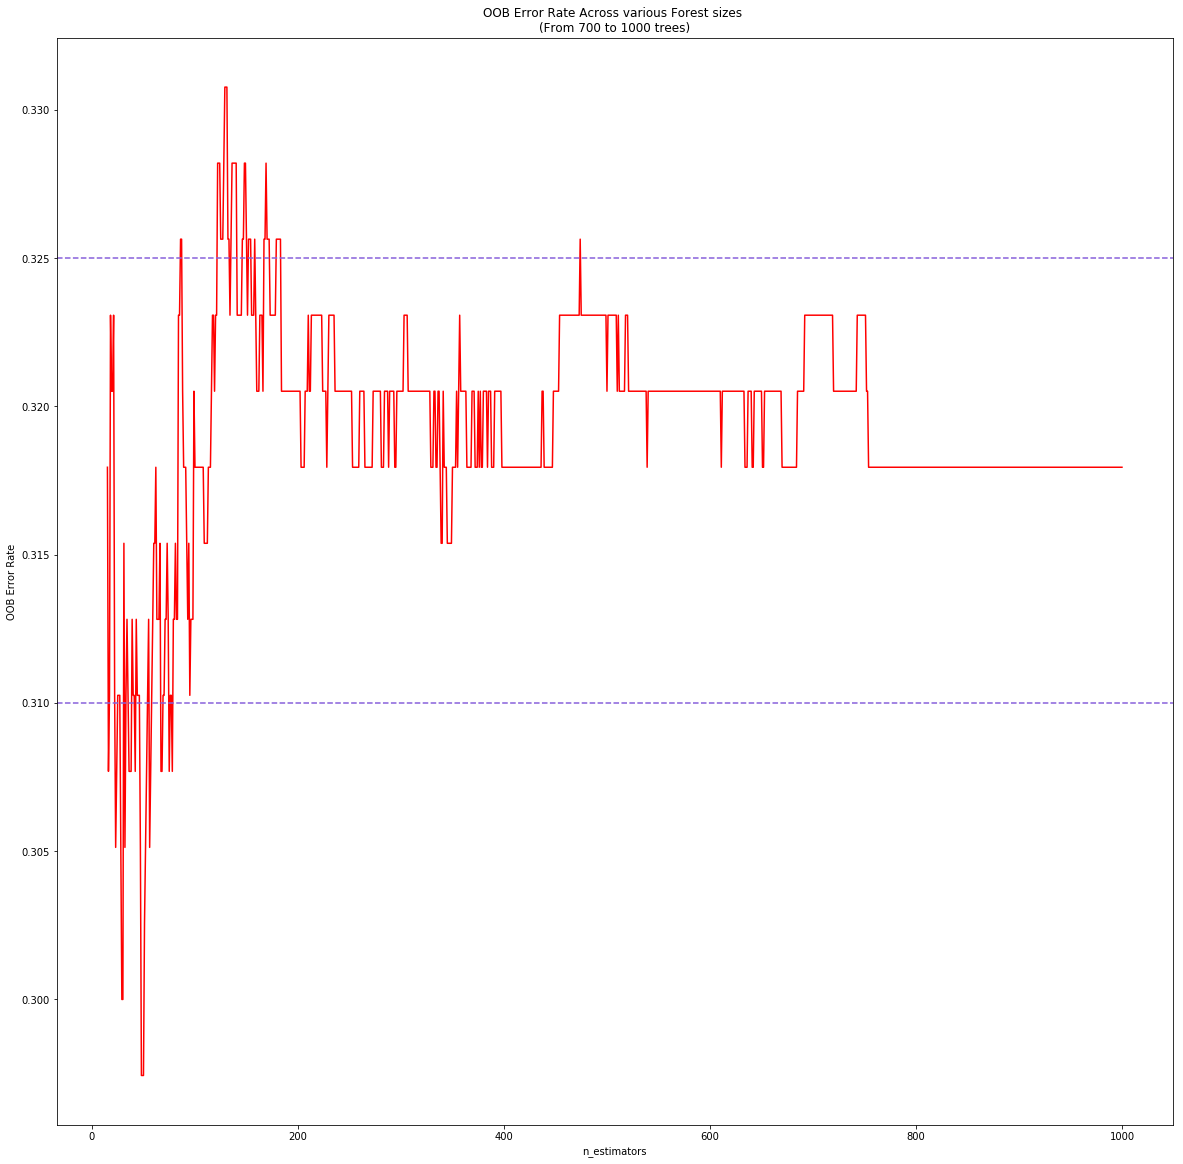

In [12]:
#Out Of Bag Error Rate

fit_rf.set_params(warm_start = True, oob_score = True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators = i)
    fit_rf.fit(X_train, y_train)
    
    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

#Convert Dictionary to a pandas seires for easy plotting
oob_series = pd.Series(error_rate)

fig, ax = plt.subplots(figsize=(20, 20))

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.325,
            color='#875FDB',
           linestyle='--')
plt.axhline(0.310,
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 700 to 1000 trees)')

In [13]:
print('OOB Error rate for 300 trees is: {0:.5f}'.format(oob_series[300]))

OOB Error rate for 300 trees is: 0.32051


In [14]:
fit_rf.set_params(n_estimators=300,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [15]:
fit_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

No handles with labels found to put in legend.


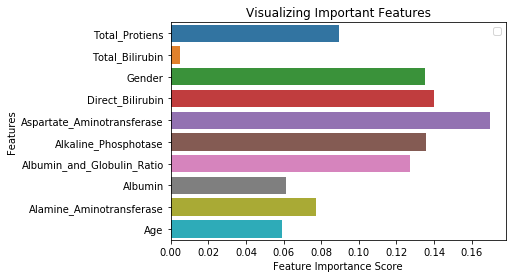

In [16]:
fit_rf.feature_importances_

feature_importance = pd.Series(fit_rf.feature_importances_, index = mod_dataset.columns[0:10].sort_values(ascending=False))

feature_importance

#Creating a bar plot

sns.barplot(x=feature_importance, y=feature_importance.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()



In [17]:
# K-Fold Cross Validation

def cross_val_metrics(fit, training_set, class_set, estimator, print_results = True):
    """
    Purpose
    ----------
    Function helps automate cross validation processes while including
    option to print metrics or store in variable

    Parameters
    ----------
    fit: Fitted model
    training_set:  Data_frame containing 80% of original dataframe
    class_set:     data_frame containing the respective target vaues
                      for the training_set
    print_results: Boolean, if true prints the metrics, else saves metrics as
                      variables

    Returns
    ----------
    scores.mean(): Float representing cross validation score
    scores.std() / 2: Float representing the standard error (derived
                from cross validation score's standard deviation)
    """
    my_estimators = {
    'rf': 'estimators_',
    'nn': 'out_activation_',
    'knn': '_fit_method'
    }
    try:
        # Captures whether first parameter is a model
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit))

        # Captures whether the model has been trained
        if not vars(fit)[my_estimators[estimator]]:
            return print("Model does not appear to be trained.")

    except KeyError as e:
        raise("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
              Please refer to function to check `my_estimators` dictionary.".format(estimator))

    n = KFold(n_splits=10)
    scores = cross_val_score(fit,
                         training_set,
                         class_set,
                         cv = n)
    if print_results:
        for i in range(0, len(scores)):
            print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))
    else:
        return scores.mean(), scores.std() / 2

In [18]:
cross_val_metrics(fit_rf, 
                  X_train, 
                  y_train, 
                  'rf',
                  print_results = True)

Cross validation run 0:  0.615
Cross validation run 1:  0.590
Cross validation run 2:  0.718
Cross validation run 3:  0.692
Cross validation run 4:  0.692
Cross validation run 5:  0.718
Cross validation run 6:  0.667
Cross validation run 7:  0.641
Cross validation run 8:  0.821
Cross validation run 9:  0.718
Accuracy:  0.687 (+/-  0.031)


In [19]:
predictions_rf = fit_rf.predict(X_test)

In [20]:
# Confusion Matrix

In [21]:
print(confusion_matrix(y_test,predictions_rf))

[[  7  45]
 [ 11 130]]


In [22]:
# Mean Acccuracy on the test set

accuracy_rf = fit_rf.score(X_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

# Caclculate the Test Error Rate and compare against OOB
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))


Here is our mean accuracy on the test set:
 0.710
The test error rate for our model is:
  0.2902


In [23]:
# ROC Curve Metrics

# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)


In [24]:
auc_rf = auc(fpr2, tpr2)

In [25]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: 	Array returned from sklearn.metrics.roc_curve for increasing
    false positive rates
    * tpr: 	Array returned from sklearn.metrics.roc_curve for increasing
    true positive rates
    * auc:	Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: 	String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim:		Set upper and lower x-limits
    * ylim:		Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        raise("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
              Please refer to function to check `my_estimators` dictionary.".format(estimator))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

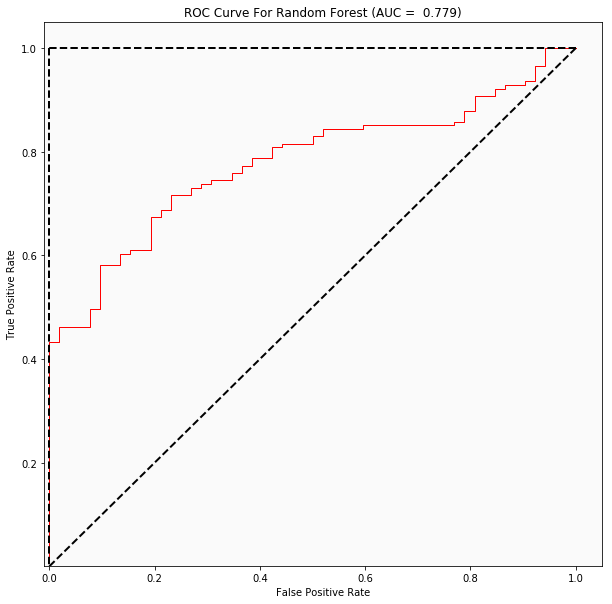

In [26]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

In [27]:
dx = ['Benign', 'Malignant']
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test, 
            target_names = dx))

In [28]:
class_report = print_class_report(predictions_rf, 'Random Forest')
print(accuracy_score(y_test, predictions_rf))

Classification Report for Random Forest:
             precision    recall  f1-score   support

     Benign       0.13      0.39      0.20        18
  Malignant       0.92      0.74      0.82       175

avg / total       0.85      0.71      0.76       193

0.7098445595854922
